# STA 141B: Midterm (or Super-Homework if you prefer)

### Worth 300 Points

Fall 2018

## Information

After the colons (in the same line) please write just your first name, last name, and the 9 digit student ID number below.

First Name: Kevin

Last Name: Chu

Student ID: 913077890

## Instructions

Please print your answer notebook to pdf (make sure that it is not unnecessarily long due to long output) and submit as the homework solution with your zip file.

For readability you,

- MUST add cells in between the exercise statements and add answers within them and
- MUST NOT modify the existing cells, particularly not the problem statement
- you may add multiple cells between exercise cells

To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language.  For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax

## Trans-Atlantic Slave Trade

In this homework, we will uncover some of the numbers behind the Trans-atlantic slave trade (TAST), also known as the middle passage, that brought African slaves to the Americas.  The middle passage is reported to have forcibly migrated over 10 million Africans to the Americas over a roughly 3 century time span.  Many aspects of the TAST is little known by most people, such as the countries that constituted this network of slave ships, the regions from which the slaves were taken, and the number of slaves captured from Africa.

This last number is especially important since the number of slaves taken from Africa can impact other estimates that result from this.  For example, when estimating the population of Africa in a given decade, demographers will use population growth models and more recent census data.  For example, there are roughly X number of people in Africa and such populations tend to grow at rate M.  Then if we want to calculate the population one century ahead then we just apply a simple formula that assumes that the population grows at this rate.  But if the population is being drained by the slave trade, then this number will tend to be underestimated because the growth rate is overestimated.  To account for this models need to take into account this drain on the population.

Throughout this homework you will need to follow the principles of graphical excellence and the grammar of graphics.  **Use only Plotnine for your graphics**, do not use Pyplot, Seaborn, or Plotly since they do not follow closely the grammar of graphics.  Be sure to include titles and necessary contextual captions.

**Warning:** The Trans-Atlantic Slave Trade remains one of the most horrific abuses of human rights in history.  This homework deals with the numbers behind this forced migration, please be aware that this is a sensitive topic for possibly yourself and others.   A suitable amount of respect and seriousness is required when dealing with this data.

**Exercise 1.** The data.

1. Read in the Trans-Atlantic Slave Trade database with Pandas.  Hint: if you use the unix tool `file` you can find that this CSV is encoded with iso-8859-1 character set.  Make sure that all missing values are encoded as NaN.
2. There is lots of missingness in this data, and some of these variables are imputed.  We will be imputing some of these variables ourselves, so delete any variable that ends with 'imp'.
3. Open up the pdf file: TAST_codebook.pdf which is the data dictionary for this and other related datasets.  Many of the variables in the codebook are not in this dataset because it is describing an updated dataset.
4. Create a list where you describe the meaning of the columns of your imported dataframe.  You can group similar columns together when describing their rough meaning, such as ownera,...,ownerp are owners of the slave ships.

Throughout we will disregard all time variables other than year since they are unreliable.

In [1]:
import pandas as pd
from plotnine import *
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('tastdb-2010.csv', encoding='Latin-1', skipinitialspace = True)

In [2]:
for column in data.columns:
    if column.endswith('imp') or len(column)<=1:
        data.drop(column,inplace=True,axis=1)

print('In total {} columns before imp drop'.format(len(data.columns)))
print('In total {} columns after imp drop'.format(len(data.columns)))

In total 89 columns before imp drop
In total 89 columns after imp drop


__1.4 EXPLANATION OF VARIABLES__

* VOYAGEID: Voyage identification
* EVGREEN: Voyage in 1999
* XMIMPFLAG: Voyage groupings for estimating imputed slaves
* SHIPNAME: Name of vessel
* NATIONAL: Country in which ship registered
* TONNAGE: Tonnage of vessel
* TONTYPE: Definition of ton used in tonnage
* RIG: Rig of veseel
* GUNS: Guns mounted
* YRCONS: Year of vessel's construction
* PLACCONS: Place where vessel constructed
* CONSTREG: Region where vessel constructed
* YRREG: Year of vessel’s registration
* PLACREG: Place wherevessel registered
* OWNER A...P : Nth owner of venture
* FATE: Particular outcome of voyage
* RESISTANCE: African resistance
* PORTDEP: Port of departure
* EMBPORT 1,2: Nth intended port of embarkation
* EMBREG 1,2: Nth intended region of purchase of slaves
* ARRPORT 1,2: Nth intended port of disembarkation
* REGARR 1,2: Nth intended region of slavelanding
* NPPRETRA: Number of ports of call prior to buying slaves
* PLAC 1...3 TRA: Nth place of slave purchase
* REGEM 1...3: Nth region of embarkation of slaves
* NPAFTTRA: Port of call before Atlantic crossing
* NPPRIOR: Number of ports of call in Americas prior to sale of slaves
* SLA1PORT: First place of slavelanding
* ADPSALE 1,2: Nth place of slave landing
* REGDIS 1...3: Nth region of slave landing
* PORTRET: Place at which voyage ended
* RETRNREG: Region of return
* RETRNREG1: Broad region of return
* DATEDEP A...C: D/M/Y that voyage began
* D1SLATR A...C: D/M/Y that slave purchase began
* DLSLATR A...C: D/M/Y that vessel left last slaving port
* DATARR 32...34: D/M/Y of first disembarkation of slaves
* DATARR 36...38: D/M/Y of second disembarkation of slaves
* DATARR 39...41: D/M/Y of third disembarkation of slaves
* DDEP AM .. AMC: D/M/Y of departure from last place of landing
* DATARR 43...45: D/M/Y on which voyage completed
* DATE_DEP: Date that voyage began
* DATE_BUY: Date that slave purchase began
* DATE_LEFTAFR: Date that vessel left last slaving port
* DATE_LAND 1...3: Date that slaves landed at Nth place
* DATE_DEPAM: Date ship left on return voyage
* DATE_END: Date when voyage completed
* VOYAGE: Length of Middle Passage in days
* CAPTAIN A...C: Nth captain's name
* CREW 1...5: Crew at different periods of journey
* CREW: Number of crew unspecified
* SAILD 1...5: Crew died at different periods of journey
* CREWDIED: Crew died during complete voyage
* NDESERT: Total number of crew deserted
* SLINTEN D...2: Slaves intended from Nth port of purchased
* NARCAR 13...17: Slaves carried from Nth port of purchase
* TSLAVESP: Total slaves purchased
* TSLAVESD: Total slaves on board at departure from last slaving
* SLAARRIV: Total slaves arrived at first port of disembarkation
* SLAS 32...39: Slaves disembarked at Nth place
* MEN1: Men embarked at first port of purchase
* WOMEN1: Women embarked at first port of purchase
* BOY1: Boys embarked at first port of purchase
* GIRL1: Girls embarked at first port of purchase
* ADULT1: Adults embarked at first port of purchase
* CHILD1: Children embarked at first port of purchase
* INFANT1: Infants embarked at first port of purchase
* MALE1: Males embarked at first port of purchase
* FEMALE1: Females embarked at first port of purchase
* MEN2: Men who died on Middle Passage
* WOMEN2: Women who died on Middle Passage
* BOY2: Boys who died on Middle Passage
* GIRL2: Girls who died on Middle Passage
* ADULT2: Adults who died on Middle Passage
* CHILD2: Children who died on Middle Passage
* MALE2: Males who died on Middle Passage
* FEMALE2: Females who died on Middle Passage
* MEN3: Men disembarked at first place of landing
* WOMEN3: Women disembarked at first place of landing
* BOY3: Boys disembarked at first place of landing
* GIRL3: Girls disembarked at first place of landing
* ADULT3: Adults disembarked at first place of landing
* CHILD3: Children disembarked at first place of landing
* INFANT3: Infants disembarked at first place of landing
* MALE3: Males disembarked at first place of landing
* FEMALE3: Females disembarked at first place of landing
* MEN4: Men embarked at second port of purchase
* WOMEN4: Women embarked at second port of purchase
* BOY4: Boys embarked at second port of purchase
* GIRL4: Girl embarked at second port of purchase
* ADULT4: Adults embarked at second port of purchase
* CHILD4: Children embarked at second port of purchase
* INFANT4: Infants embarked at second port of purchase
* MALE4: Males embarked at second port of purchase
* FEMALE4: Females embarked second port of purchase
* MEN5: Men embarked at third port of purchase
* WOMEN5: Women embarked at third port of purchase
* BOY5: Boys embarked at third port of purchase
* GIRL5: Girls embarked at third port of purchase
* ADULT5: Adults embarked at third port of purchase
* CHILD5: Children embarked at third port of purchase
* MALE5: Males embarked at third port of purchase
* FEMALE5: Females embarked at third port of purchase
* MEN6: Men disembarked at second place of landing
* WOMEN6: Women disembarked at second place of landing
* BOY6: Boys disembarked at second place of landi ng
* GIRL6: Girls disembarked at second place of landing
* ADULT6: Adults disembarked at second place of landing
* CHILD6: Children disembarked at second place of landing
* MALE6: Males disembarked at second place of landing
* FEMALE6: Females disembarked at second place of landing
* SLADAFRI: Slaves deaths before leav ing Africa
* SLADVOY: Slaves deaths between Af rica and the Americas
* SLADAMER: Slaves deaths between arrival and sale
* SOURCE A...R: Nth source of information

**Exercise 2.** First pass at estimating the total number of captives.

1. We will ultimately try to estimate the number of people captured into slavery and forced through the middle passage.  What variable would you use to estimate the total number of captives taken from Africa?  Let me call this variable Var A in this problem statement.   How much of the data for Var A is missing?
2. Create an initial estimate of the total number of captives taken from Africa by assuming that Var A is Missing Completely at Random.  
3. What other variables do you expect to be associated with Var A and why?  Give at least three possibilities.  Which will probably be the most strongly associated with this variable?  (I will be looking for a specific variable to be listed so be sure to think about the most strongly associated one.)

In [3]:
#2.1 Choose to use TSLAVESP which represents total slaves purchased
total_slaves_na = data['tslavesd'].isna().sum()
print('total # of na values: ', total_slaves_na)

total_slaves_recorded = data['tslavesd'].sum()
print('total # of slaves recorded: ', total_slaves_recorded)

total # of na values:  26734
total # of slaves recorded:  2717383.5555555555


In [4]:
#2.2
avg_slave_per_ship = total_slaves_recorded / (data.shape[0] - total_slaves_na)
missing_slave_count = total_slaves_na * avg_slave_per_ship
total_slaves_predicted = missing_slave_count + total_slaves_recorded

print('avg slave per ship: ', avg_slave_per_ship)
print('missing slave count: ', missing_slave_count)
print('total slave count: ', total_slaves_predicted)

avg slave per ship:  331.10558737121426
missing slave count:  8851776.772782043
total slave count:  11569160.328337599


__2.3 Answer__

The variable most strongly associated with variable A (# of people captured into slavery and forced through the middle passage)
would be:

* SLAARRIV (total slaves arrived at the first port of disembarkation)
* TONNAGE (higher value for tonnage = higher capacity = more room for cargo/people)
* CREW (larger crew = increased ability to control more people)

**Exercise 3.** The flag that the ships flew.

1. We want to understand the trends of the nationality of the slave ships (the flag that they flew under is in the national variable).  Subselect the values of `national` that have more than 100 voyages with that value.  
2. Create a DataFrame that filters out the voyages where `national` does not have one of these values.  You should be retaining voyages with only these most common values.
3. Create a variable, `flag`, that is a string of easily readable names for these values by looking them up in the pdf codebook.
4. Using Plotnine, plot the counts of the voyages by flag as a function of voyage year.  Think about how best to display the count of a voyage by year and then how should you be including the flag variable.
5. In this plot, what are the geometric elements and aesthetic mappings?  What other components of the grammar of graphics are you using?
6. Do you observe any abrupt changes in the patterns of these counts for a given flag?  Investigate the cause for this change (using Google, etc.).

In [5]:
#3.1
national_counts = data['national'].value_counts()
which_100 = [7, 4, 10, 9, 1, 8, 5, 11]
national_100_plus = data[data['national'].isin(which_100)]

In [6]:
#3.2
national_100_minus = data[~data['national'].isin(which_100)]

In [7]:
#3.3
flag = {1: 'Spain', 2: 'Uruguay', 4: 'Portugal', 5: 'Brazil', 7: 'Great Britain', 8: 'Netherlands', 9: 'U.S.A.', 10: 'France',
       11: 'Denmark', 12: 'Hanse Towns, Brandenburg', 13: 'Sweden', 14: 'Norway', 16: 'Argentina', 17: 'Russia', 18: 'Sardinia', 
       19: 'Mexico', 24: 'Genoa'}

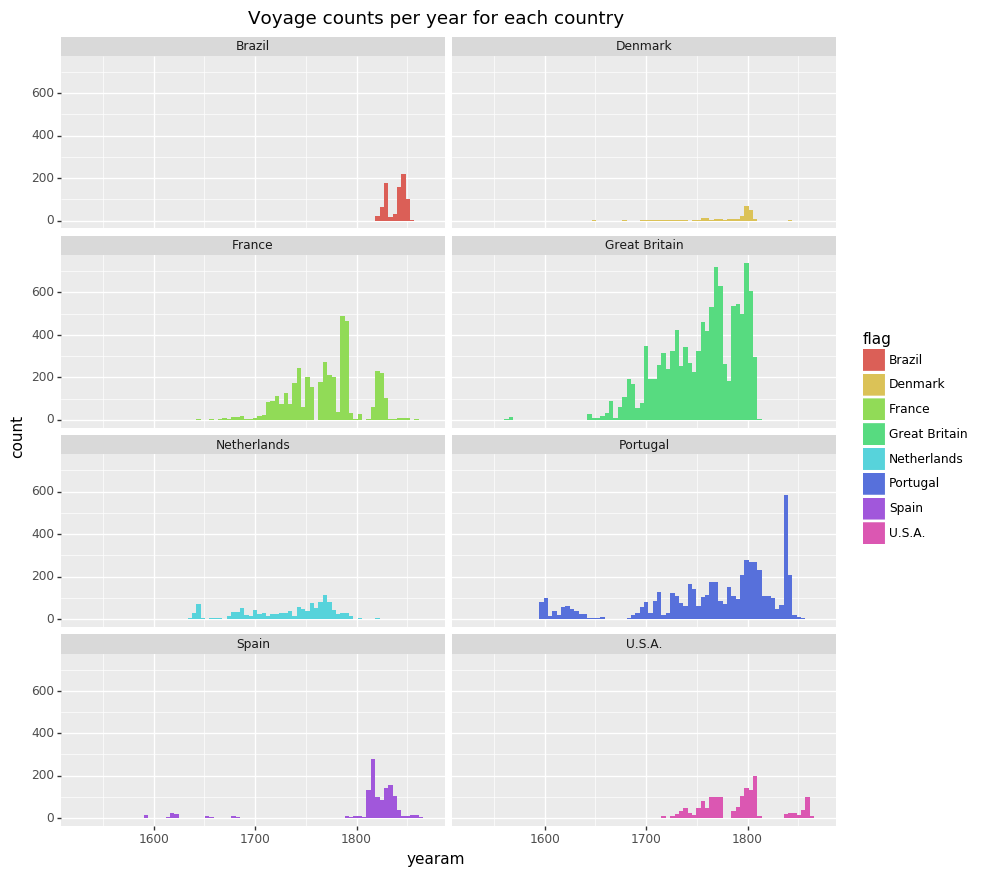

<ggplot: (-9223371876033384851)>

In [8]:
#3.4
national_100_plus2 = national_100_plus[['national', 'yearam']]
national_100_plus2['national'] = national_100_plus['national'].astype(int)
national_100_plus2['flag'] = national_100_plus2['national'].map(flag)

ggplot(national_100_plus2) \
+ aes(x = 'yearam', fill = 'flag') \
+ geom_histogram() \
+ facet_wrap('~flag', ncol = 2) \
+ theme(figure_size = (10, 10)) \
+ ggtitle('Voyage counts per year for each country')

__3.5__

* national_100_plus2: dataframe with 'yearam', 'national', 'flag' columns
* geom_histogram of x = 'yearam' to visualize the data
* color = 'flag' for a better looking visual
* theme used to change plot size for an image thats easier to see
* ggtitle to title the plot
* facet_wrap used to visualize the data for each country

__3.6__

* A sharp dip I noticed was for the earlier 1800's in the US. After some research (https://en.wikipedia.org/wiki/Slavery_in_the_United_States#1790_to_1860), I found that the cause of this was due to a ban on importing slaves for 20 years. Almost all of the other countries with the exception of Portugal also experienced a drop in the frequency after that 1800's (more obvious towards end of century). 

**Exercise 4.** Looking at some of these ships.

1. Search for the slave ship mentioned in the following wikipedia article: https://en.wikipedia.org/wiki/Brookes_(ship) Hint: Look at all records of ships with 'Brook' in the name and try to match the characteristics to those described.  How many voyages for this ship are in the data (try to exclude ships with the same name)?
2. Create a variable that is True if there was a resistance (like a slave revolt) on the ship.  Plot the density of ships as a function of year with and without revolts and compare these distributions.
3. The movie Amistad was based on a real slave ship and slave uprising.  Read about it here: https://en.wikipedia.org/wiki/La_Amistad  Try to find this ship by searching for it by name and also searching for ships in the same 10 year period as this event with a slave resistance.  If you think you found it describe it, otherwise describe the events of another voyage that you did find.  

In [9]:
#4.1
brookes_data = data.copy()
brookes_data = brookes_data[['shipname', 'national', 'slaarriv', 'tonnage', 'yrcons']]
brookes_data = brookes_data[brookes_data['shipname'].str.contains('Brook').fillna(False)]
brookes_data = brookes_data[brookes_data['national'] == 7]
brookes_data = brookes_data[brookes_data['yrcons'] == 1781]
brookes_data = brookes_data[brookes_data['tonnage'] == 297]
print('Total voyages: ', brookes_data.shape[0])

Total voyages:  4


__4.1__

* Link provided by Baelee Wang
https://www.encyclopediavirginia.org/_Description_of_the_Slave_Ship_Brookes_chapter_6_of_Liverpool_and_Slavery_by_a_Genuine_Dicky_Sam_1884?fbclid=IwAR1yEqorzYEj03BkrOaQJHFyWW5P8-SmzzTZ-hi8qWmKSzuZ03-AQkZlnaw

* The wiki article states that the ship was British
* The link provided by Baelee states that she ship was constructed in 1781 and it had a tonnage value of 297
* From this information, it appears that the ship made 4 total voyages

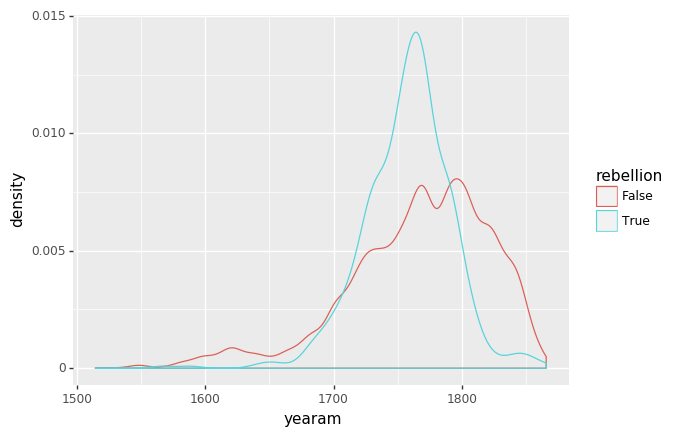

<ggplot: (160828138735)>

In [10]:
#4.2
data_rebellion = data.copy()
data_rebellion['rebellion'] = (data_rebellion['resistance'] >= 1)
rebellion_data = data_rebellion[data_rebellion['rebellion'] == True]
non_rebellion_data = data_rebellion[data_rebellion['rebellion'] != True]

ggplot(data_rebellion, aes(x = 'yearam', color = 'rebellion')) \
+ geom_density()

__4.2__

* Both distributions follow a left skewed pattern. Slave resistances have larger values of density around the 1700's (peak at around 1760). 

In [11]:
#4.3
amistad_name_data = data[data['shipname'].str.contains('Amistad').fillna(False)]
amistad_year_data = data[(data['yearam'] > 1829) & (data['yearam'] < 1849) & 
                         (data['resistance'] == 1) & (data['national'] == 1)]
amistad_year_data

,voyageid,evgreen,shipname,national,placcons,yrcons,placreg,yrreg,rig,tonnage,...,sourcei,sourcej,sourcek,sourcel,sourcem,sourcen,sourceo,sourcep,sourceq,sourcer
2047,2071,1.0,Jesús María,1.0,NaN,NaN,NaN,NaN,2.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


__4.3__

* Filtering just by name = 'Amistad' yielded too many results.
* Filtering by 'yearam' within a 10 year period of 1839 (given in wiki article), 'resistance' = 1 (revolt), and 'national' = 1 (Spain), returned 1 ship with the name Jesus Maria. This method of filtering led to a ship that decently matches the one described in the wiki article.

**Exercise 5.** Other patterns.

1. The arrival and departure locations are quite detailed.  Look in the appendix of the codebook for the location codes.  Make a coarser version of both arrival and departure port variables (select just the last departure and first arrival) so that for example,  
```
30000 Caribbean 36100 Martinique 36101 Fort-Royale
```
is just encoded as '3' or Caribbean.
2. Plot the trend of voyages as a function of arrival location.  What trends do you see?
3. Do the same for departure location.
4. Plot the ratio of captives that are men as a function of year.  Include a smoother to describe the over all trend.  Also include in the plot another possible confounding variable.
5. Describe the geoms, aesthetic mappings, and other aspects of the plot.

In [12]:
#5.1
data_arrival = data.copy()
data_arrival = data_arrival.dropna(subset = ['sla1port'])
data_arrival['sla1port'] = data_arrival['sla1port']//10000

location_dict = {1.0: 'Europe', 2.0: 'Mainland North America', 3.0: 'Caribbean', 4.0: 'Spanish American Mainland',
                5.0: 'Brazil', 6.0: 'Africa', 8.0: 'Other'}
location_indices = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 8.0]

for i in location_indices:
    data_arrival['arrival'] = data_arrival['sla1port'].map(location_dict)

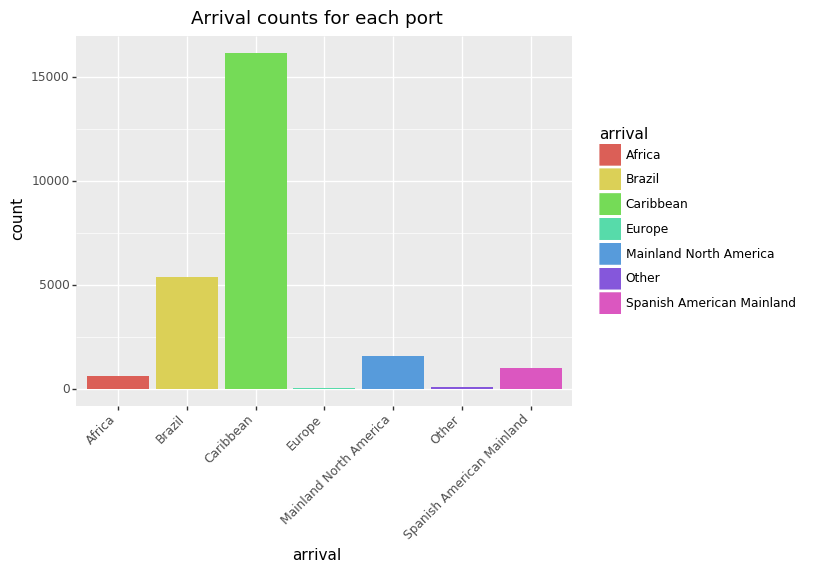

<ggplot: (-9223371876021210557)>

In [13]:
#5.2
ggplot(data_arrival) \
+ aes(x = 'arrival', fill = 'arrival') \
+ geom_bar() \
+ theme(axis_text_x = element_text(angle = 45, hjust = 1)) \
+ ggtitle('Arrival counts for each port')

__5.2__

* Caribbean has the highest counts of arrival locations and the next highest is Brazil. After these 2 locations, the other values are not close at all.

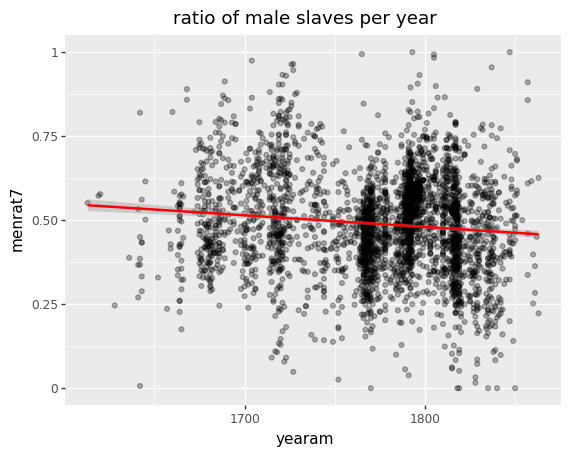

<ggplot: (-9223371876020963489)>

In [14]:
#5.4
data_men = data.copy()
data_men = data_men.dropna(subset = ['menrat7'])
data_men['menrat7']

ggplot(data_men) \
+ aes(x = 'yearam', y = 'menrat7') \
+ geom_point(alpha = 0.3) \
+ geom_smooth(method = 'lm', color = 'red') \
+ ggtitle('ratio of male slaves per year')

__5.5__

__5.2 PLOT DESCRIPTION__

* data_arrival = dataframe of original data with droppped NA values for 'sla1port' column. Also has an 'arrival' column to determine country of each voyage
* geom_histogram of x = 'arrival' to visualize frequency for each country
* fill = 'arrival' for a better looking visual
* theme used to adjust x-axis tick viewing angles
* ggtitle to title the plot

__5.4 PLOT DESCRIPTION__

* data_men = dataframe of original data with dropped NA values for 'menrat7' column
* scatterplot of x = 'yearam', y = 'menrat7'
* geom_point to plot points
* alpha = 0.3 to help visualize density of data
* geom_smooth(method = 'lm, alpha = 0) to see regression line without the bands
* ggtitle to title the plot

There seems to be a downward trend for the ratio of males per year as the year value increases.

**Exercise 6.** Estimating total captives count I.

1. Plot the number of slaves at departure from last slaving and the number that arrived at the first port of disembarkation.  
2. Why do these variables concentrate near a line?  Most of the data lies on one side of the line, but a small fraction do not, what could have happened for those that did not?  Separate the data into these two populations.
3. For those voyages where the number of captives decreased (through death), calculate a death rate (ratio of captives that died).  
4. Plot this death rate as a function of year.  Make any appropriate scale transformations, and include a trend line or other smoother.  What is your interpretation?
5. Guess at two possible predictors and create visualizations that give you a sense of their association with the death rate.  Make sure that one of these is categorical, and plot it with the death rate and year so that there are three variables used in the same plot.
6. For these plots, list the geoms, aesthetic mappings, scales, and other notable aspects used.

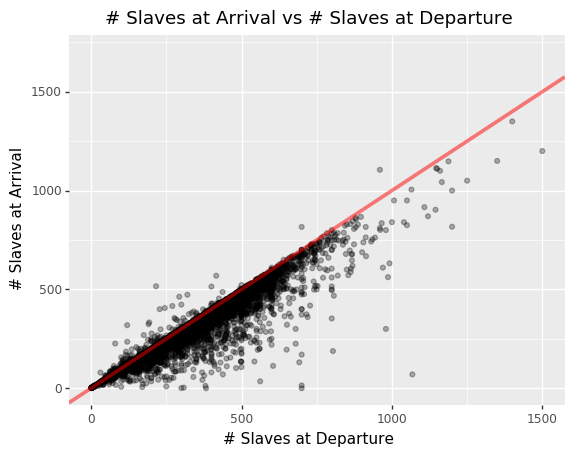

<ggplot: (160833556463)>

In [15]:
#6.1
ggplot(data) \
+ aes(x = 'tslavesd', y = 'slaarriv') \
+ geom_point(alpha = 0.3) \
+ geom_abline(mapping = aes(slope = 1, intercept = 0), color = 'red', size = 1.5, alpha = 0.5) \
+ xlab('# Slaves at Departure') \
+ ylab('# Slaves at Arrival') \
+ ggtitle('# Slaves at Arrival vs # Slaves at Departure')

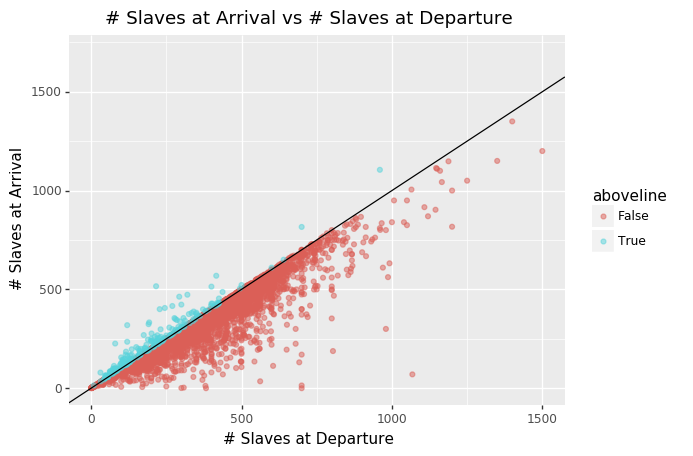

<ggplot: (-9223371876021202414)>

In [16]:
#6.2
data_death = data.copy()
data_death['aboveline'] = data_death['slaarriv'] > data_death['tslavesd']

ggplot(data_death) \
+ aes(x = 'tslavesd', y = 'slaarriv', color = 'aboveline') \
+ geom_point(alpha = 0.5) \
+ geom_abline(mapping = aes(slope = 1, intercept = 0)) \
+ xlab('# Slaves at Departure') \
+ ylab('# Slaves at Arrival') \
+ ggtitle('# Slaves at Arrival vs # Slaves at Departure')

__6.2__

* These variables concentrate near a line because it indicates the number of slaves on board at the beginning vs the number of slaves that leave the ship. Values fall below the line because maybe some slaves either died or abandoned the ship. There are many reasons why some points fall above the line. Some of these reasons include; maybe the number of slaves were miscounted or maybe the ship stopped somewhere and picked up more slaves between ports.

In [17]:
#6.3
data_death_below = data.copy()
data_death_below = data_death_below.loc[data_death_below['slaarriv'] <= data_death_below['tslavesd']]
death_ratio = (data_death_below['tslavesd'].sum() - data_death_below['slaarriv'].sum()) / data_death_below['tslavesd'].sum()
print('death ratio for ships with captives decreased by death: ', death_ratio)

death ratio for ships with captives decreased by death:  0.12428683337095228


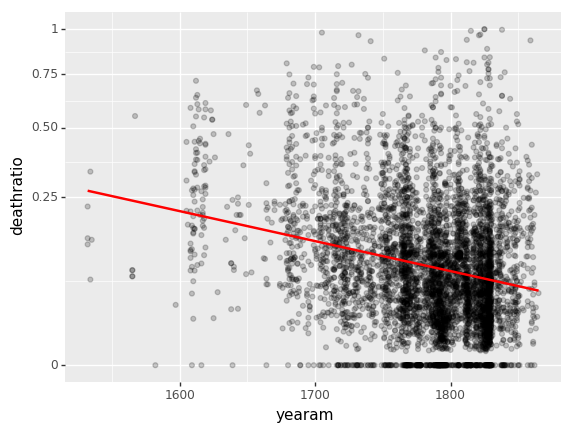

<ggplot: (160827418337)>

In [18]:
#6.4
data_death_below['deathratio'] = (data_death_below['tslavesd'] - data_death_below['slaarriv']) / data_death_below['tslavesd']

ggplot(data_death_below) \
+ aes(x = 'yearam', y = 'deathratio') \
+ scale_y_sqrt() \
+ geom_point(alpha = 0.2) \
+ geom_smooth(method = 'lm', color = 'red', alpha = 0)

#scale sqrt because the data for death ratio is right skewed

__6.4__

* From the plot, it seems that death rate steadily trends downwards as years pass by. The data also seems heavily right skewed.

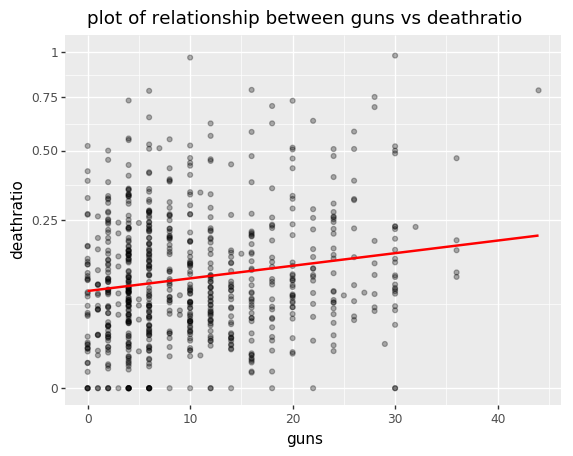

<ggplot: (160837538957)>

In [19]:
#6.5 PLOT 1
ggplot(data_death_below) \
+ aes(x = 'guns', y = 'deathratio') \
+ geom_point(alpha = 0.3) \
+ geom_smooth(method = 'lm', color = 'red', alpha = 0) \
+ scale_y_sqrt() \
+ ggtitle('plot of relationship between guns vs deathratio')

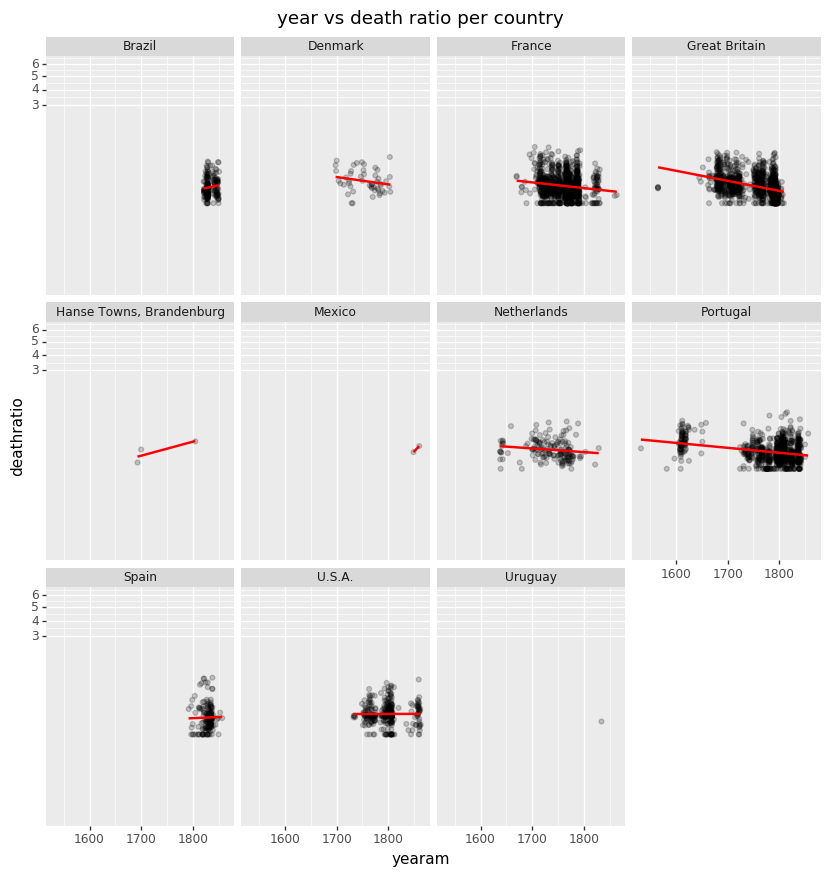

<ggplot: (160833598479)>

In [20]:
#6.5 PLOT 2
data_death_below['flag'] = data_death_below['national'].map(flag)

ggplot(data_death_below.dropna(subset = ['flag'])) \
+ aes(x = 'yearam', y = 'deathratio') \
+ scale_y_sqrt() \
+ geom_point(alpha = 0.2) \
+ facet_wrap('~flag') \
+ geom_smooth(method = 'lm', color = 'red', alpha = 0) \
+ theme(figure_size = (10, 10)) \
+ ggtitle('year vs death ratio per country')

__6.5__

* For the predictors, I chose 'guns' and 'national'
* I chose 'guns' because in my opinion 'guns' usually has a correlation with death rate.
* I chose 'national' because death rate might be linked with different countries. To be more specific, I thought that different countries might have different views on how to treat slaves.



__6.6__

__6.1 PLOT DESCRIPTION__

* data = original dataframe
* scatterplot of x = 'tslavesd', y = 'slaarriv'
* geom_point to plot points
* alpha = 0.3 to help visualize density of the data
* geom_abline to separate the data with y = x
* xlab, ylab, ggtitle to change labels and title the plot

__6.2 PLOT DESCRIPTION__

* data_death = dataframe of original data with an added column 'aboveline' to differentiate which points are above/below line
* scatterplot of x = 'tslavesd', y = 'slaarriv'
* geom_point alpha = 0.5 to help visualize density of the data
* color = 'aboveline' to help visualize which points are above/below line
* geom_abline line to separate the data with y = x
* xlab, ylab, ggtitle to change labels and title the plot

__6.4 PLOT DESCRIPTION__

* data_death_below = dataframe with an additional column 'deathratio' which equals the deathratio of each observation
* scatterplot of x = 'yearam', y = 'deathratio'
* scale_y_sqrt used to scale the data because the data is heavily right skewed
* geom_point alpha = 0.2 to help visualize the density of the data
* geom_smooth(method = 'lm' and alpha = 0) to see regression line without bands

__6.5 PLOT1 DESCRIPTION__

* data_death_below = dataframe with an additional column 'deathratio' which equals the deathratio of each observation
* scatterplot of x = 'guns', y = 'deathratio'
* scale_y_sqrt used to scale the data because the data is heavily right skewed
* geom_point alpha = 0.3 to help visualize the density of the data
* geom_smooth(method = 'lm', color = 'red', alpha = 0) to see regression line without bands
* ggtitle to title the plot

__6.5 PLOT2 DESCRIPTION__

* data_death_below = original dataframe with additional columns 'deathratio' and 'flag' which equals death ratio and country of each observation. dropna() used to drop NA values of the flag column
* scatterplot of x = 'yearam', y = 'deathratio
* scale_y_sqrt used to scale the data because the data is heavily right skeed
* geom_point alpha = 0.2 to help visualize the density of the data
* facet_wrap by flag to see separate plots for each country
* geom_smooth(method = 'lm', color = 'red', alpha = 0) to see regression lines without bands
* theme figure_size used to change the size of the plot to see everything more easily
* ggtitle used to title the plot

**Exercise 7.** Estimating total captives count II.

1. Using the variables selected, fit a prediction of death rate using linear regression and some simple transformations/scales.  You do not need to spend time doing automated model selection, just include the most likely predictor or predictors from the previous question.
2. We will impute the number of captives on board at departure, so enumerate the cases for missingness of the variables involved in the prediction.
3. We would like to predict the number of captives on departure from the number that arrived with the following formula,
$$
\textrm{arrived} = \pi (1 - \textrm{death rate}) \cdot (\textrm{captives taken}) + (1- \pi) (\textrm{average increase})
$$
where $\pi$ is the proportion of voyages with no increase in captives, and the average increase is over those that did see an increase. 
For those voyages with captives taken missing and arrived not missing, use the estimated death rate to predict the captives taken.
4. Impute the remainder by predicting the captives taken with the year variable, you can use simple linear regression.
5. With the same formula and method impute the number of captives upon arrival whenever it is missing.
6. Give a new estimate of the predicted total number of captives taken on the middle passage, the total number of deaths, and the overall death rate.  How does this differ from your first estimate obtained by assuming MCAR?

In [21]:
#7.1
#Received advice from Baelee Wang to use smf.ols to fit the model
#Also used smf.ols because I am more familiar with the y = mx + b notations. 
#Not too sure on how to use sm.ols for multiple linear regression
#https://stackoverflow.com/questions/30650257/ols-using-statsmodel-formula-api-versus-statsmodel-api/45088483
data_predict = data_death_below[['yearam', 'guns', 'flag', 'deathratio']]
model_7_1 = smf.ols(formula = 'deathratio ~ yearam + guns + flag', data = data_predict).fit()
model_7_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             deathratio   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     2.760
Date:                Sat, 17 Nov 2018   Prob (F-statistic):            0.00240
Time:                        01:05:20   Log-Likelihood:                 350.76
No. Observations:                 710   AIC:                            -679.5
Df Residuals:                     699   BIC:                            -629.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            0.5669      0.378      1.500      0.134      -0.175       1.309
flag[T.Denmark]                   -8.59e-14   5.78e-14     -1.485      0.138   -1.99e-13    2.76e-14
flag[T.France]                      -0.0104      0.070     -0.149      0.881      -0.148       0.127
flag[T.Great Britain]                0.0042      0.069      0.061      0.951      -0.130       0.139
flag[T.Hanse Towns, Brandenburg]    -0.1869      0.165     -1.134      0.257      -0.510       0.137
flag[T.Mexico]                       0.0730      0.163      0.448      0.654      -0.247       0.393
flag[T.Netherlands]                 -0.0274      0.072     -0.380      0.704      -0.169       0.114
flag[T.Portugal]                     0.0232      0.072      0.322      0.748      -0.119       0.165
flag[T.Spain]                        0.0552      0.072      0.764      0.445      -0.087       0.197
flag[T.U.S.A.]                       0.0022      0.076      0.028      0.977      -0.148       0.152
flag[T.Uruguay]                  -3.957e-18   2.67e-18     -1.484      0.138   -9.19e-18    1.28e-18
yearam                              -0.0003      0.000     -1.294      0.196      -0.001       0.000
guns                                 0.0031      0.001      3.282      0.001       0.001       0.005
==============================================================================
Omnibus:                      280.812   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1008.759
Skew:                           1.890   Prob(JB):                    8.93e-220
Kurtosis:                       7.451   Cond. No.                     3.74e+23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.57e-38. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [22]:
#7.2
data_impute = data.copy()
data_impute = data_impute[['tslavesd', 'slaarriv', 'yearam']]
data_impute['tslavesd'] = data_impute['tslavesd'].fillna(-1)
data_impute['slaarriv'] = data_impute['slaarriv'].fillna(-1)

In [23]:
#7.3
data_death_drop = data.copy()
data_death_drop = data_death_drop[['yearam', 'guns', 'national', 'slaarriv', 'tslavesd']].dropna()

data_death_drop_above = data_death_drop.copy()
data_death_drop_above = data_death_drop_above.loc[data_death_drop_above['slaarriv'] > 
                                                 data_death_drop_above['tslavesd']]
data_death_drop_above['flag'] = data_death_drop_above['national'].map(flag)

data_death_drop_below = data_death_drop.copy()
data_death_drop_below = data_death_drop_below.loc[data_death_drop_below['slaarriv'] <=
                                                 data_death_drop_below['tslavesd']]
data_death_drop_below['flag'] = data_death_drop_below['national'].map(flag)

pi = len(data_death_drop_below) / len(data_death_drop)
avg_inc = (data_death_drop_above['slaarriv'] - data_death_drop_above['tslavesd']).mean()
death_rate = (data_death_drop_below['tslavesd'].sum() - 
              data_death_drop_below['slaarriv'].sum()) / data_death_drop_below['tslavesd'].sum()

for i in range(len(data_impute)):
    if (data_impute.loc[i, 'tslavesd'] == -1) & (data_impute.loc[i, 'slaarriv'] != -1):
        data_impute.loc[i, 'tslavesd'] = data_impute.loc[i, 'slaarriv'] / (1 - death_rate)

In [24]:
#7.4
data_predicted_tslavesd = data_impute.copy()
data_predicted_tslavesd = data_predicted_tslavesd[data_predicted_tslavesd['tslavesd'] >= 0]

model_7_2 = smf.ols(formula = 'tslavesd ~ yearam', data = data_predicted_tslavesd).fit()
model_7_2.summary()
intercept = model_7_2.params[0]
coefficient = model_7_2.params[1]

for i in range(len(data_impute)):
    if (data_impute.loc[i, 'tslavesd'] == -1):
        data_impute.loc[i, 'tslavesd'] = (data_impute.loc[i, 'yearam'] * coefficient) + intercept

In [25]:
#7.5
for i in range(len(data_impute)):
    if data_impute.loc[i, 'slaarriv'] == -1:
        data_impute.loc[i, 'slaarriv'] = ((pi * (1 - death_rate)) * 
                                          data_impute.loc[i, 'tslavesd'] +
                                          (1 - pi) * avg_inc)

In [26]:
#7.6
total_slaves_predicted2 = data_impute['tslavesd'].sum()
total_deaths_predicted = data_impute['tslavesd'].sum() - data_impute['slaarriv'].sum()
total_death_rate = total_deaths_predicted/total_slaves_predicted2

print('original estimate of the predicted total number of captives: ', total_slaves_predicted)
print('new estimate of the predicted total number of captives: ', total_slaves_predicted2)

print('\nnew estimate of the predicted number of deaths: ', total_deaths_predicted)

print('\noriginal estimate of death rate: ', death_rate)
print('new estimate of death rate: ', total_death_rate)

original estimate of the predicted total number of captives:  11569160.328337599
new estimate of the predicted total number of captives:  11077133.405651875

new estimate of the predicted number of deaths:  1839536.5917260982

original estimate of death rate:  0.15673635085841922
new estimate of death rate:  0.16606612237670743


__7.6__

* The estimated number of captives is lower than when predicting with MCAR
* The estimated death rate is higher than when predicting with MCAR

In [29]:
national_100_plus2['flag']

0             Portugal
15            Portugal
94            Portugal
113             France
114             France
115           Portugal
116             France
117        Netherlands
118             France
119             France
120             France
121           Portugal
122             France
123              Spain
124              Spain
125           Portugal
126              Spain
127              Spain
128             U.S.A.
129              Spain
130           Portugal
131             France
132              Spain
140           Portugal
154           Portugal
157           Portugal
165           Portugal
171           Portugal
197             Brazil
199           Portugal
             ...      
34904           U.S.A.
34905           U.S.A.
34906           Brazil
34907           Brazil
34908           Brazil
34910           Brazil
34912           Brazil
34913           Brazil
34914           Brazil
34915           U.S.A.
34916           Brazil
34917    Great Britain
34918      